In [1]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from src.rocket import Rocket
from src.pos_rocket_vis import *
from LandMPC_template.nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 5 # simulation length in seconds
x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(30), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               3, #x [m]
               2, #y [m]
               10  #z [m]
               ])  # initial state 
x_ref = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               0, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               1, #x [m]
               0, #y [m]
               3  #z [m]
               ])  # reference state 
xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 1 # horizon time 
nmpc = NmpcCtrl(rocket, H, xs, us, Ts)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


In [4]:
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol = rocket.simulate_land(nmpc, sim_time, H, x0)

Simulating time 0.00
      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |  13.00ms (  5.38us)  11.73ms (  4.85us)      2417
       nlp_g  |  90.00ms ( 37.24us)  92.19ms ( 38.14us)      2417
  nlp_grad_f  |  11.00ms ( 13.72us)   6.05ms (  7.55us)       802
   nlp_jac_g  |  56.00ms ( 69.83us)  60.76ms ( 75.77us)       802
       total  |   6.06 s (  6.06 s)   6.06 s (  6.06 s)         1
NMPC solver failed at t = 0.0
x0 = [ 0.          0.          0.          0.          0.          0.52359878
  0.          0.          0.          3.          2.         10.        ]
X (debug): [[ 2.47616786e-26  1.17415205e-01  2.35344868e-01  3.54862950e-01
   4.77967565e-01  6.05029048e-01  7.36217757e-01  8.71541159e-01
   1.01087088e+00  9.10300967e-01  8.11080314e-01  7.13096967e-01
   6.12059270e-01  5.08106251e-01  4.01330242e-01 -2.19665288e-01
  -1.19406712e+00 -2.27817650e+00 -3.17214070e+00 -2.13368305e+00
  -1.06864365e+00]
 [-1.14557434e-28 -1.32263339e-01 -2.6406

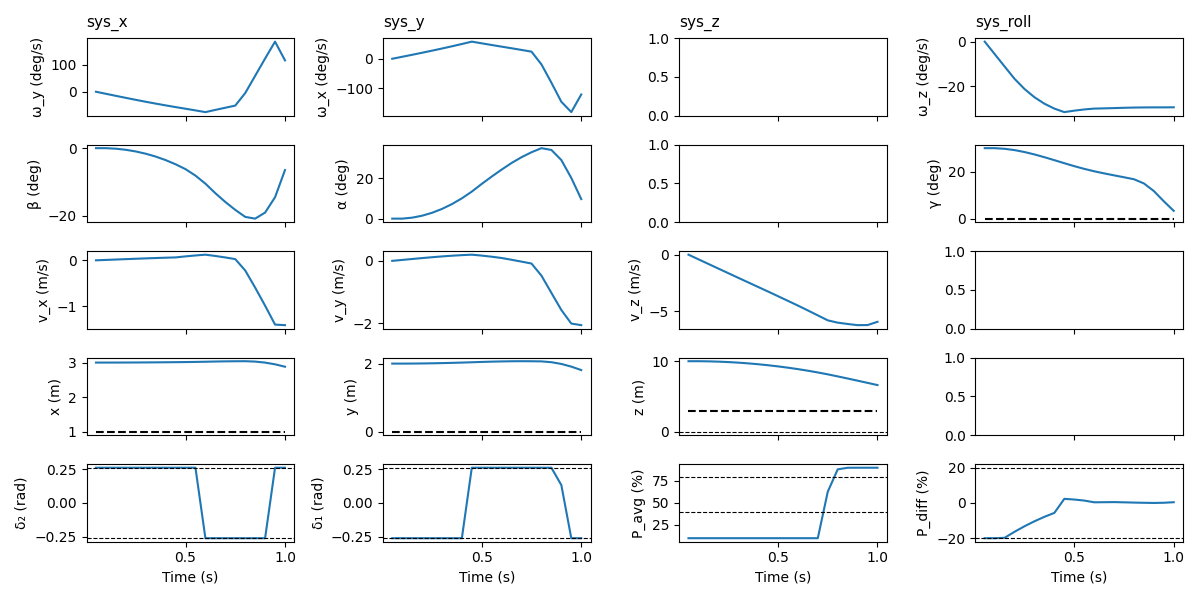

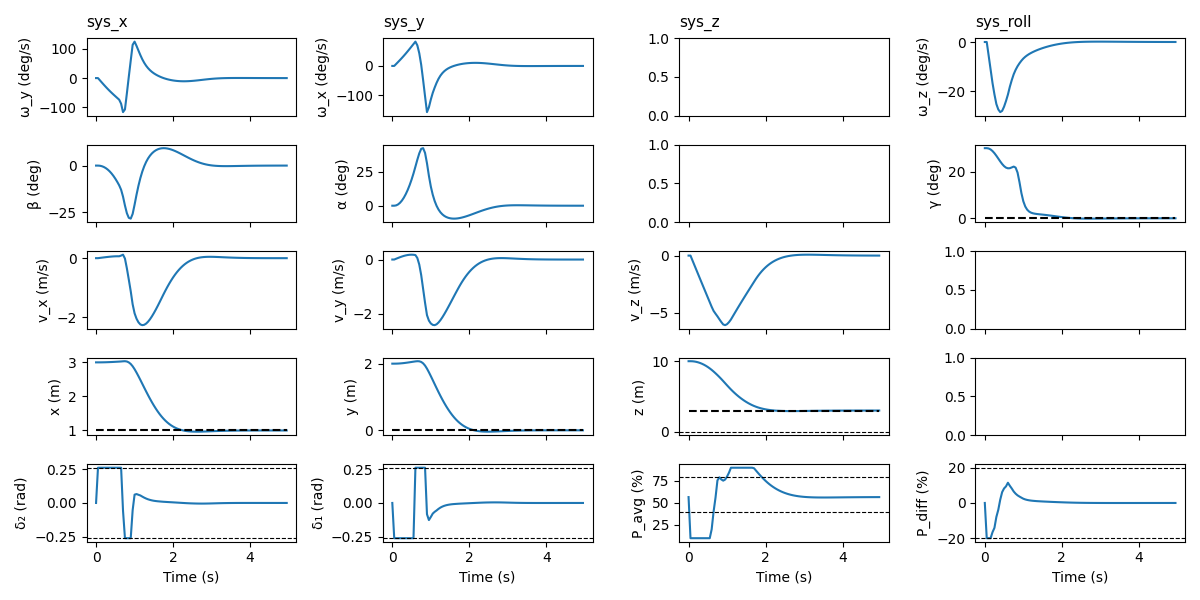

In [5]:
# vis.animate(t_cl[:-1], x_cl[:,:-1], u_cl, T_ol=t_ol[...,:-1], X_ol=x_ol, U_ol=u_ol)
#Open Loop
plot_static_states_inputs(t_ol[:-1,1], x_ol[:,:-1,1], u_ol[...,1], xs)
#Closed loop
plot_static_states_inputs(t_cl[:-1], x_cl[:,:-1], u_cl, xs)